<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-и-прочтение-данных" data-toc-modified-id="Открытие-и-прочтение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие и прочтение данных</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Удаление-признака" data-toc-modified-id="Удаление-признака-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Удаление признака</a></span></li><li><span><a href="#Проверка-на-выбросы-и-сильную-корреляцию" data-toc-modified-id="Проверка-на-выбросы-и-сильную-корреляцию-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка на выбросы и сильную корреляцию</a></span></li><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Нефтедобывающая компания решает вопрос - где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Открытие и прочтение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

df1.info()
print()
df2.info()
print()
df3.info()

df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Входные данные представляют собой 3 таблицы, в которых каждая строка является наблюдением об одной нефтянной скважине по 5 признакам. Каждая таблица представляет свой отдельный территориальный регион. Признаки в талбицах идентичны:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

Во всех таблицах отсутствуют пропущенные значения.

### Проверка на дубликаты

In [2]:
n = 1
for df in (df1, df2, df3):
    dublicates = df.duplicated().sum()
    print(f'В таблице номер {n} количество дублирующихся строк = {dublicates}')
    n += 1

В таблице номер 1 количество дублирующихся строк = 0
В таблице номер 2 количество дублирующихся строк = 0
В таблице номер 3 количество дублирующихся строк = 0


Отлично, дубликатов нигде нет.

### Удаление признака

Признак *id* не несет никакой полезной информации для обучения и даже может сильно спортить результаты. Удалим его из каждой таблицы.

In [3]:
df1 = df1.drop('id', axis=1)
df2 = df2.drop('id', axis=1)
df3 = df3.drop('id', axis=1)

### Проверка на выбросы и сильную корреляцию

Посмотрим на распределения признаковв таблицах и выведем матрицы корреляций

_________Информация по таблице номер 1_________

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


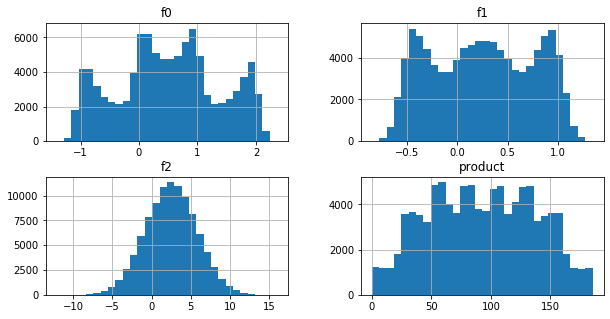

_________Информация по таблице номер 2_________

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000


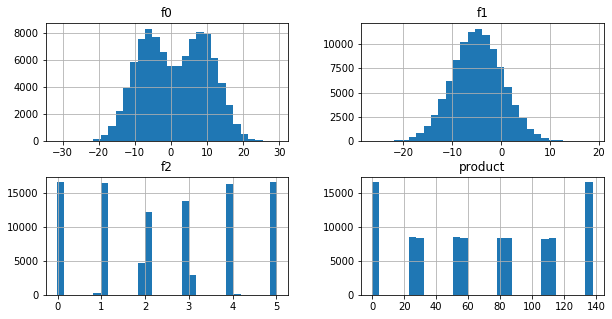

_________Информация по таблице номер 3_________

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


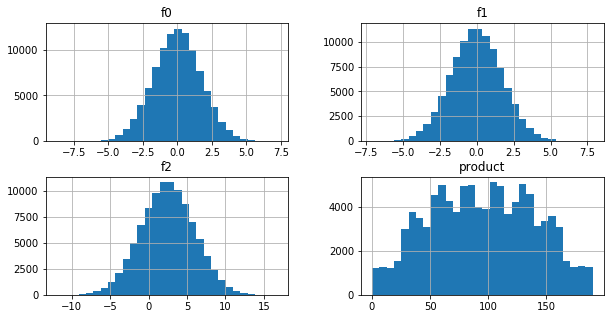

In [4]:
n = 1
for df in (df1, df2, df3):
    print(f'_________Информация по таблице номер {n}_________', end='\n\n')
    print(df.corr())
    df.hist(figsize=(10,5), bins=30)
    plt.show()
    n += 1

Как видно из распределений - выбросов нет. Сильно выбивающихся значений, относительно других нет ни в одном признаке.

Во второй таблице, в столбце *product* есть смущающий пик нуле, однако пустые скважины явно не стоит исключать из исследования.

Также отстутствует сильная корреляция между признаками для обучения. Следовательно оставим все признаки во всех таблицах. 

### Разделение данных

Разделим каждую таблицу на обучающие данные и валидационные в соотношении 3:1.

In [5]:
def split(df):
    '''
    функция принимает датафрейм и делит его в соотношении 3:1
    для каждой доли возвращает разделенные выборки по признаку product 
    '''
    train, valid =  train_test_split(df, test_size=0.25, random_state=5)
    
    features_train = train.drop('product', axis=1)
    target_train = train['product']
    
    features_valid = valid.drop('product', axis=1)
    target_valid = valid['product']
    
    return features_train, target_train, features_valid, target_valid

features_train_1, target_train_1, features_valid_1, target_valid_1 = split(df1)
features_train_2, target_train_2, features_valid_2, target_valid_2 = split(df2)
features_train_3, target_train_3, features_valid_3, target_valid_3 = split(df3)

### Вывод:

Данные были загружены в проект и прочитаны. Импротированы все библиотеки, нужные для выполнения проекта.

Затем данные были преобработаны:
- Проверены дубликаты и пропуски
- Удален ненжуный столбец
- Проверены выбросы
- Провена корреляция обучающих признаков
- Данные разделены на обучающий и валидационные

## Обучение и проверка модели

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые). Построим и обучим модели. Оценить их качество поможет метрика RMSE.

In [6]:
model = LinearRegression()
model.fit(features_train_1, target_train_1)
predictions_1 = pd.Series(model.predict(features_valid_1), index=target_valid_1.index)

print('Результаты модели по 1 региону')
print('Mean:', predictions_1.mean())
print('RMSE:', mean_squared_error(target_valid_1, predictions_1) ** 0.5)

Результаты модели по 1 региону
Mean: 92.62394691552272
RMSE: 37.80284530541535


In [7]:
model = LinearRegression()
model.fit(features_train_2, target_train_2)
predictions_2 = pd.Series(model.predict(features_valid_2), index=target_valid_2.index)

print('Результаты модели по 2 региону')
print(f'Mean:', predictions_2.mean())
print('RMSE:',mean_squared_error(target_valid_2, predictions_2) ** 0.5)

Результаты модели по 2 региону
Mean: 68.6475648923721
RMSE: 0.8911637870714576


In [8]:
model = LinearRegression()
model.fit(features_train_3, target_train_3)
predictions_3 =  pd.Series(model.predict(features_valid_3), index=target_valid_3.index)

print('Результаты модели по 3 региону')
print(f'Mean:', predictions_3.mean())
print('RMSE:',mean_squared_error(target_valid_3, predictions_3) ** 0.5)

Результаты модели по 3 региону
Mean: 95.02417827030403
RMSE: 40.27855914124022


### Вывод:

Лучше всего обучилась модель для 2го региона. Отклонение очень маленькое и это говорит о высоком качестве предсказаний. Однако средний запас наименьший. Гораздо хуже обуились модели для 1го и 3го регионов. Здесь метрика качества почти в 40 раз хуже, но средние запасы существенно выше чем во 2ом.

## Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [9]:
budget = 10000000000
product_price = 450000
well_count = 200

print('Минимальный объем сырья в скажине:', ((budget / well_count) / product_price))

Минимальный объем сырья в скажине: 111.11111111111111


In [10]:
n = 1
for product in (target_train_1, target_train_2, target_train_3):
    print(f'Средний объем сырья в регионе {n}: ', product.mean())
    n += 1

Средний объем сырья в регионе 1:  92.36560282077443
Средний объем сырья в регионе 2:  68.88624149497971
Средний объем сырья в регионе 3:  94.97044352906028


### Вывод:
В среднем ни один регион не обладает достаточным количеством сырья для безубыточной разработки. Это говорит о том, что нельзя брать скважины наугад. Нужно выявить лучший регион с максимально возможным положительным доходом.

## Расчёт прибыли и рисков 
Сначала напишем функцию для вычисления прибыли по выбранным скважинам и предсказаниям модели.

In [11]:
def revenue(predictions, target):
    #отсортируем предсказания модели
    sorted_pred = predictions.sort_values(ascending=False)
    #выберем 200 лучших скважин и посчитаем их реальную прибыль
    selected = target[sorted_pred.index][:200]
    return selected.sum() * product_price - budget

Теперь для удобства напишем функцию, которая техникой bootstrap найдет нам  95%-й доверительный интервал для прибыли и риск убытков, а так же среднюю возможную выручку.

In [12]:
def bootstrap_and_risk(predictions, target, n):
    state = np.random.RandomState(5)
    revenues_array = []
    
    for _ in range(1000):
        target_subsample = target.sample(n=500, random_state=state, replace=True)
        pred_subsample = predictions[target_subsample.index]
        revenues_array.append(revenue(pred_subsample, target_subsample))
    revenues_array = pd.Series(revenues_array)
    
    lower = revenues_array.quantile(0.025)
    upper = revenues_array.quantile(0.975)
    revenues_mean = revenues_array.mean()
    risk = len(revenues_array[revenues_array<0]) / len(revenues_array) * 100
    
    print(f'Информация по {n} региону')
    print(f'Нижняя граница доверительного интервала: {lower:.0f}, верхняя: {upper:.0f}')
    print('Риск убытков: {:.2f}%'.format(risk))
    print(f'Средняя возможная прибыль: {revenues_mean:.0f}')
    

Наконец произведем рассчеты для каждого региона.

In [13]:
bootstrap_and_risk(predictions_1, target_valid_1, 1)

Информация по 1 региону
Нижняя граница доверительного интервала: -64841868, верхняя: 1019943347
Риск убытков: 4.40%
Средняя возможная прибыль: 488751802


In [14]:
bootstrap_and_risk(predictions_2, target_valid_2, 2)

Информация по 2 региону
Нижняя граница доверительного интервала: 84564688, верхняя: 908011174
Риск убытков: 0.70%
Средняя возможная прибыль: 484489711


In [15]:
bootstrap_and_risk(predictions_3, target_valid_3, 3)

Информация по 3 региону
Нижняя граница доверительного интервала: -184882007, верхняя: 897859603
Риск убытков: 10.00%
Средняя возможная прибыль: 356747171


## Общий вывод:

Для компании опасно проводить разработку в регионах, в которых вероятность убытков больше 2.5%. Это означает, что по результатам исследования подходит лишь **второй регион**.

Риск убытков второго региона не превышает 1%. Нижняя граница доверительного интервала, говорит о том, что с 95% вероятностью прибыль будет не меньше 85млн. рублей. А средняя возможная, говорит, что она будет 485млн.